In [148]:
import cv2 
import numpy as np
import os 
import matplotlib.pyplot as plt

In [149]:
image_path = '/Users/dimka777/Documents/Магистратура/Mag_2_semester/ImageProcessing/LW_1/test.jpg'

In [150]:
image = cv2.imread(image_path)

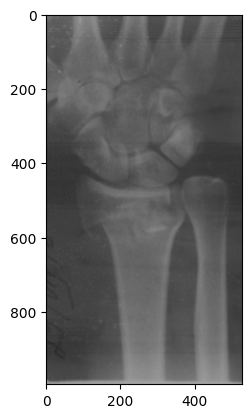

In [151]:
plt.imshow(image)

In [152]:
image_L = cv2.cvtColor(image, cv2.COLOR_RGB2LAB)[...,0]

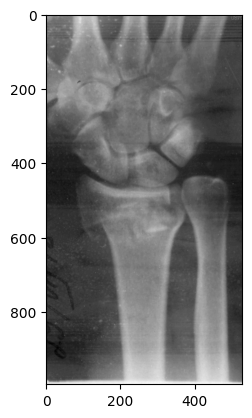

In [153]:
plt.imshow(image_L, cmap='gray')

In [154]:
def get_hist(image):
    histogram, bin_edges = np.histogram(image, bins=256)
    # plt.plot(bin_edges[0:-1], histogram) 
    ax = plt.hist(image.ravel(), bins = 256, range =(0, 255))
    
    plt.show()
    return image.ravel()

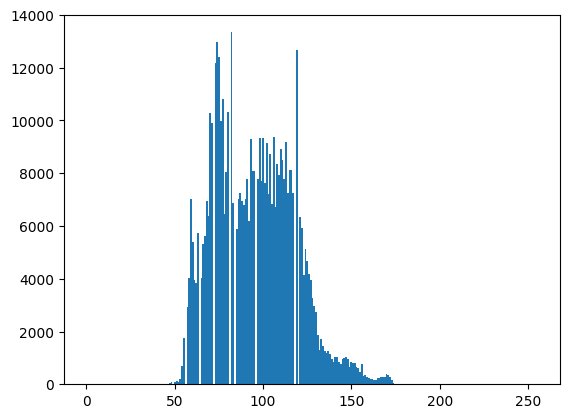

In [155]:
ravel  = get_hist(image_L)

In [156]:
I_min = ravel.min()
I_max = ravel.max()

In [157]:
print(I_min, I_max)

43 176


In [158]:
# Контраст Майкельсона
contrast_m  = (I_max-I_min)/(I_max+I_min)
contrast = I_max-I_min
print(contrast_m)
print(contrast)

0.6073059360730594
133


In [159]:
def deg_gamma(img, gamma):
    return np.array(255*(img / 255) ** gamma, dtype = 'uint8')

In [160]:
def hist_normalization(img, a=0, b=255):
	# get max and min
	c = img.min()
	d = img.max()
 
	out = img.copy()
 
	# normalization
	out = (b-a) / (d - c) * (out - c) + a
	out[out < a] = a
	out[out > b] = b
	out = out.astype(np.uint8)
	
	return out

In [161]:
img_gamma = deg_gamma(image, 1)

In [162]:
img_norm = hist_normalization(image_L)

(-0.5, 527.5, 995.5, -0.5)

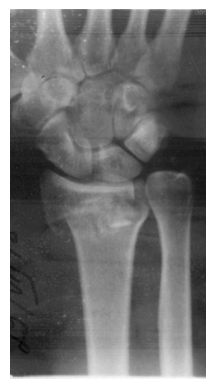

In [163]:
plt.imshow(img_norm, cmap='gray')
plt.axis('off')

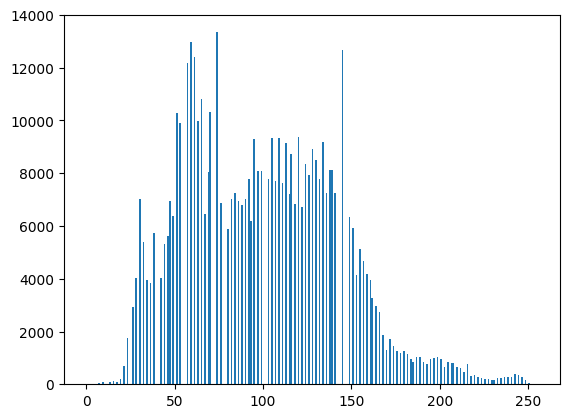

In [164]:
ravel  = get_hist(img_norm)

In [165]:
I_min = ravel.min()
I_max = ravel.max()
print(I_min, I_max)
# Контраст Майкельсона
contrast_m  = (I_max-I_min)/(I_max+I_min)
contrast = I_max-I_min
print(contrast_m)
print(contrast)

0 255
1.0
255


In [166]:
def get_equalization(image):
    h, w = image.shape
    hist, bins = np.histogram(image, 256)
    cdf = hist.cumsum()
    cdf = (cdf-cdf[0])*255/(cdf[-1]-1)
    cdf = cdf.astype(np.uint8)# Transform from float64 back to unit8
    result = np.zeros((h, w, 1), dtype =np.uint8)
    result = cdf[image]
    return result

(-0.5, 527.5, 995.5, -0.5)

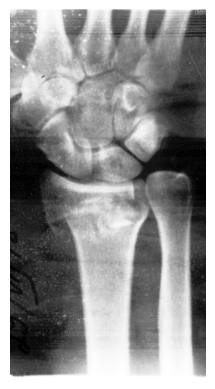

In [167]:
image_equ = get_equalization(img_norm)
plt.imshow(image_equ, cmap='gray')
plt.axis('off')

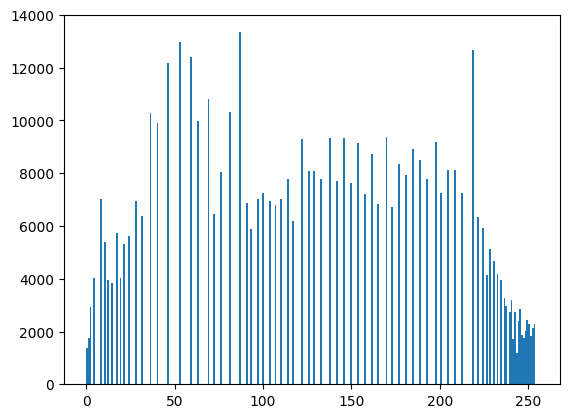

In [168]:
ravel  = get_hist(image_equ)

In [169]:
I_min = ravel.min()
I_max = ravel.max()
print(I_min, I_max)
# Контраст Майкельсона
contrast_m  = (I_max-I_min)/(I_max+I_min)
contrast = I_max-I_min
print(contrast_m)
print(contrast)

0 254
1.0
254


In [170]:
def pixel_val(pix, r1, s1, r2, s2):
    if (0 <= pix and pix <= r1):
        return (s1 / r1)*pix
    elif (r1 < pix and pix <= r2):
        return ((s2 - s1)/(r2 - r1)) * (pix - r1) + s1
    else:
        return ((255 - s2)/(255 - r2)) * (pix - r2) + s2

In [171]:
r1 = 80
s1 = 0
r2 = 130
s2 = 255

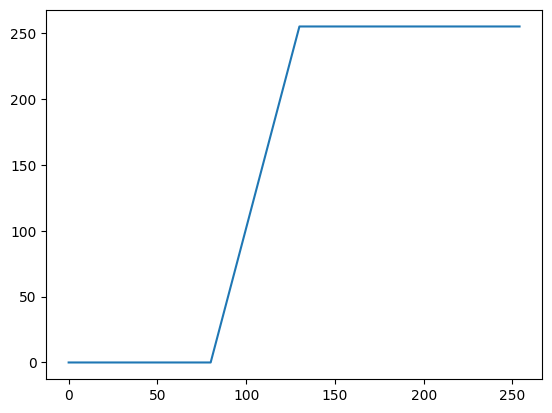

In [172]:
pixelVal_vec = np.vectorize(pixel_val)
x = np.arange(0,255)
y = pixelVal_vec(x, r1, s1, r2, s2)
plt.plot(x,y)

(-0.5, 527.5, 995.5, -0.5)

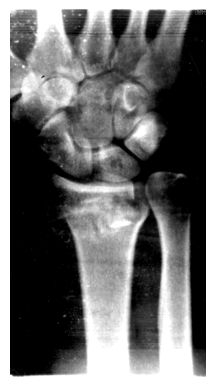

In [173]:
image_line = pixelVal_vec(image_L, r1, s1, r2, s2)
plt.imshow(image_line, cmap='gray')
plt.axis('off')

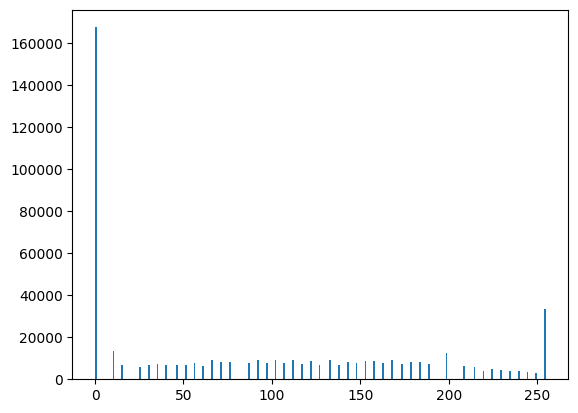

In [174]:
ravel  = get_hist(image_line)

In [175]:
I_min = ravel.min()
I_max = ravel.max()
print(I_min, I_max)
# Контраст Майкельсона
contrast_m  = (I_max-I_min)/(I_max+I_min)
contrast = I_max-I_min
print(contrast_m)
print(contrast)

0.0 255.0
1.0
255.0


In [176]:
def deg_gamma(img, gamma):
    return np.array(255*(img / 255) ** gamma, dtype = 'uint8')

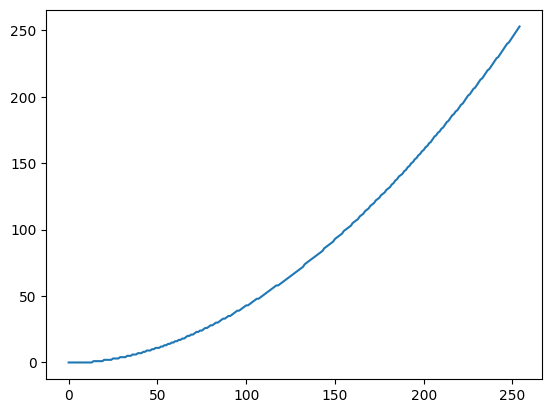

In [190]:
x = np.arange(0,255)
y = deg_gamma(x, 1.9)
plt.plot(x,y)

(-0.5, 527.5, 995.5, -0.5)

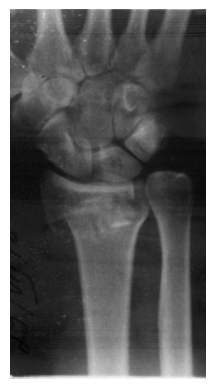

In [191]:
image_gamma= deg_gamma(image_L, 1.9)
plt.imshow(image_gamma, cmap='gray')
plt.axis('off')

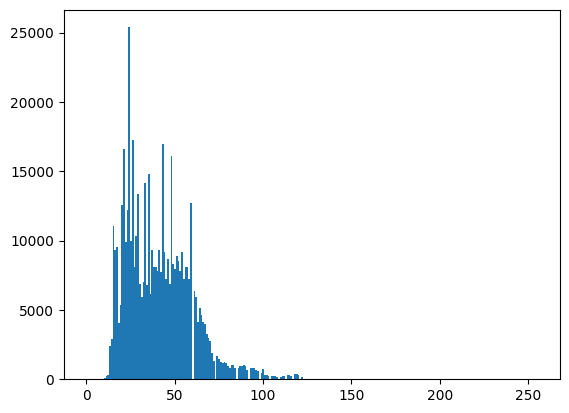

In [192]:
ravel  = get_hist(image_gamma)

In [193]:
I_min = ravel.min()
I_max = ravel.max()
print(I_min, I_max)
# Контраст Майкельсона
contrast_m  = (I_max-I_min)/(I_max+I_min)
contrast = I_max-I_min
print(contrast_m)
print(contrast)

8 126
0.8805970149253731
118
